In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv('../data/beauty.csv', sep=';')

In [4]:
df.sort_values(by=['female','wage'], ascending=False).head()


,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4
152,12.12,35,1,0,0,1,0,1,17,3
149,10.62,18,1,1,0,1,1,1,17,3
334,10.53,18,0,1,0,1,1,1,16,3
18,10.44,10,0,1,0,1,0,0,17,4


In [17]:
df['wage'].head()

0     5.73
1     4.28
2     7.96
3    11.57
4    11.42
Name: wage, dtype: float64

In [19]:
df.shape

(1260, 10)

In [20]:
df.columns

Index(['wage', 'exper', 'union', 'goodhlth', 'black', 'female', 'married',
       'service', 'educ', 'looks'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
wage        1260 non-null float64
exper       1260 non-null int64
union       1260 non-null int64
goodhlth    1260 non-null int64
black       1260 non-null int64
female      1260 non-null int64
married     1260 non-null int64
service     1260 non-null int64
educ        1260 non-null int64
looks       1260 non-null int64
dtypes: float64(1), int64(9)
memory usage: 98.5 KB


In [22]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


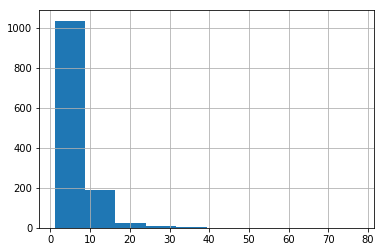

In [24]:
df['wage'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1e34d5f98>,
      dtype=object)

<Figure size 864x576 with 0 Axes>

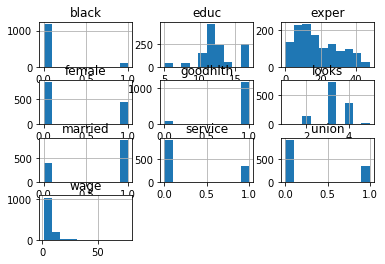

In [28]:
plt.figure(figsize=(12,8))
df.hist()

In [33]:
df['female'].value_counts(normalize=True)

0    0.653968
1    0.346032
Name: female, dtype: float64

In [32]:
df['goodhlth'].mean()

0.9333333333333333

### Indexing

In [37]:
df.iloc[:6,5:7]

,female,married
0,1,1
1,1,1
2,1,0
3,0,1
4,0,1
5,1,1


In [40]:
toy_df=pd.DataFrame({'age': [17,32,56], 'salary': [56, 69, 120]}, index=['Kate','Leo','Max'])

In [41]:
toy_df

,age,salary
Kate,17,56
Leo,32,69
Max,56,120


In [43]:
toy_df.iloc[1,1]

69

In [45]:
toy_df.loc[['Leo','Max'],'age']

Leo    32
Max    56
Name: age, dtype: int64

In [49]:
df[(df['wage']>40) & (df['female']==1)]

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
602,77.72,9,1,1,1,1,1,1,13,4


In [50]:
def gender_id_to_str(gender_id):
    return 'female' if gender_id==1 else 'male'

In [53]:
df['female'].apply(lambda gender_id: 'female' if gender_id==1 else 'male').head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

In [54]:
df['female'].map({0:'male', 1:'female'}).head()

0    female
1    female
2    female
3      male
4      male
Name: female, dtype: object

In [56]:
df.loc[df['female']==0,'wage'].median()

6.41

In [57]:
df.loc[df['female']==1,'wage'].median()

3.75

In [58]:
df.groupby('female')

In [63]:
for (gender_id, sub_dataframe) in df.groupby('female'):
    print('Median wages for {} are {}'.format('man' if gender_id==0 else 'women', sub_dataframe['wage'].median()))

Median wages for man are 6.41
Median wages for women are 3.75


In [66]:
df.groupby(['female','married'])['wage'].median()

female  married
0       0          5.065
        1          6.710
1       0          3.890
        1          3.580
Name: wage, dtype: float64

In [120]:
pd.crosstab(df['female'],df['married'], normalize=True)

married,0,1
female,,
0,0.131746,0.522222
1,0.176984,0.169048


In [68]:
import seaborn as sns

In [69]:
df['educ'].value_counts()

12    468
13    246
10    156
17    132
16    121
14     51
8      44
5      42
Name: educ, dtype: int64

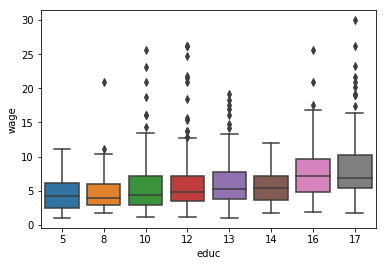

In [72]:
sns.boxplot(x='educ',y='wage',data=df[df['wage']<30])

In [5]:
tel=pd.read_csv('../data/telecom_churn.csv')

In [6]:
tel.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [79]:
tel.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [80]:
tel.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


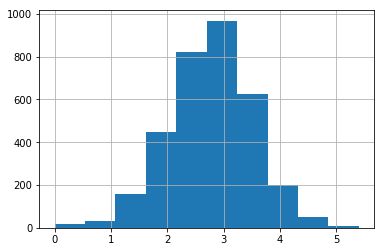

In [82]:
tel['Total intl charge'].hist()

In [88]:
tel['Churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: Churn, dtype: float64

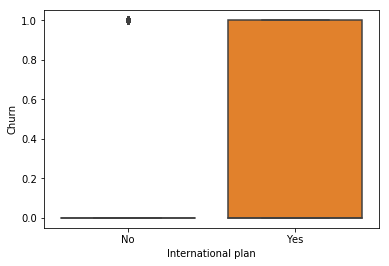

In [126]:
sns.boxplot(x='International plan', y='Churn', data=tel)

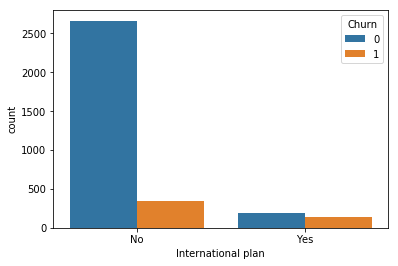

In [128]:
sns.countplot(x='International plan', hue='Churn', data=tel)

In [106]:
df.describe(include=['object'])

ValueError: No objects to concatenate

In [109]:
tel.mean()

State                                           0j
Account length             0.00030003000300030005j
Area code                                       0j
International plan         0.00030003000300030005j
Voice mail plan                                 0j
Number vmail messages      0.00030003000300030005j
Total day minutes          (179.77509750975116+0j)
Total day calls            (100.43564356435644+0j)
Total day charge           (30.562307230723096+0j)
Total eve minutes          (200.98034803480346+0j)
Total eve calls            (100.11431143114312+0j)
Total eve charge           (17.083540354035396+0j)
Total night minutes        (200.87203720372048+0j)
Total night calls          (100.10771077107711+0j)
Total night charge          (9.039324932493264+0j)
Total intl minutes         (10.237293729372935+0j)
Total intl calls           (4.4794479447944795+0j)
Total intl charge          (2.7645814581458046+0j)
Customer service calls      (1.562856285628563+0j)
Churn                     (0.14

In [110]:
tel[tel["Churn"]==False].mean()

Account length            100.793684
Area code                 437.074737
Number vmail messages       8.604561
Total day minutes         175.175754
Total day calls           100.283158
Total day charge           29.780421
Total eve minutes         199.043298
Total eve calls           100.038596
Total eve charge           16.918909
Total night minutes       200.133193
Total night calls         100.058246
Total night charge          9.006074
Total intl minutes         10.158877
Total intl calls            4.532982
Total intl charge           2.743404
Customer service calls      1.449825
Churn                       0.000000
dtype: float64

In [116]:
tel[tel["Churn"]==1]["Total day minutes"].mean()

206.91407867494814

In [112]:
tel["Churn"]=tel["Churn"].astype("int64")

In [119]:
import numpy as np
columns_to_show = ['Total day minutes', 'Total eve minutes', 
                   'Total night minutes']

tel.groupby(['Churn'])[columns_to_show].agg([np.mean, np.std, np.min, 
                                            np.max])

Total day minutes                        Total eve minutes             \
                   mean        std amin   amax              mean        std   
Churn                                                                         
0            175.175754  50.181655  0.0  315.6        199.043298  50.292175   
1            206.914079  68.997792  0.0  350.8        212.410145  51.728910   

                   Total night minutes                          
       amin   amax                mean        std  amin   amax  
Churn                                                           
0       0.0  361.8          200.133193  51.105032  23.2  395.0  
1      70.9  363.7          205.231677  47.132825  47.4  354.9

In [121]:
tel.pivot_table(['Total day calls', 'Total eve calls', 'Total night calls'],
               ['Area code'], aggfunc='mean')

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.496420,99.788783,99.039379
415,100.576435,100.503927,100.398187
510,100.097619,99.671429,100.601190


In [124]:
tel['Total calls'] = tel['Total day calls'] + tel['Total eve calls'] + \
              tel['Total night calls'] + tel['Total intl calls']
tel.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


In [131]:
pd.crosstab(tel['Churn'], tel['Customer service calls'], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


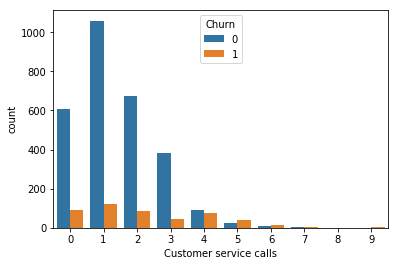

In [132]:
sns.countplot(x='Customer service calls', hue='Churn', data=tel);

In [133]:
tel['Many_service_calls'] = (tel['Customer service calls'] > 3).astype('int')

pd.crosstab(tel['Many_service_calls'], tel['Churn'], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


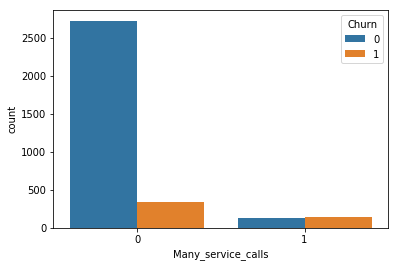

In [134]:
sns.countplot(x='Many_service_calls', hue='Churn', data=tel);

In [136]:
pd.crosstab(tel['Many_service_calls'] & tel['International plan'] , tel['Churn'], normalize=True)

Churn,0,1
row_0,,
False,0.816382,0.103510
True,0.038704,0.041404
